# Boosting Techniques - Practical

#### Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, f1_score, mean_squared_error

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')
np.random.seed(95)

### **1. Train an AdaBoost Classifier on a sample dataset and print model accuracy**

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=95)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=95)

abc = AdaBoostClassifier(random_state=95)
abc.fit(X_train, y_train)
acc = accuracy_score(y_test, abc.predict(X_test))
print(f'AdaBoost Classifier Accuracy: {acc:.2f}')

AdaBoost Classifier Accuracy: 0.91


### **2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)**

In [3]:
Xr, yr = make_regression(n_samples=500, n_features=10, noise=0.3, random_state=95)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=95)

abr = AdaBoostRegressor(random_state=95)
abr.fit(Xr_train, yr_train)
mae = mean_absolute_error(yr_test, abr.predict(Xr_test))
print(f'AdaBoost Regressor MAE: {mae:.2f}')

AdaBoost Regressor MAE: 84.44


### **3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance**

Feature Importances (top 10 only in descending order):
	worst perimeter: 0.5460
	worst radius: 0.1613
	worst concave points: 0.0980
	worst texture: 0.0473
	mean concave points: 0.0408
	worst smoothness: 0.0404
	worst area: 0.0129
	area error: 0.0116
	mean area: 0.0077
	worst concavity: 0.0057


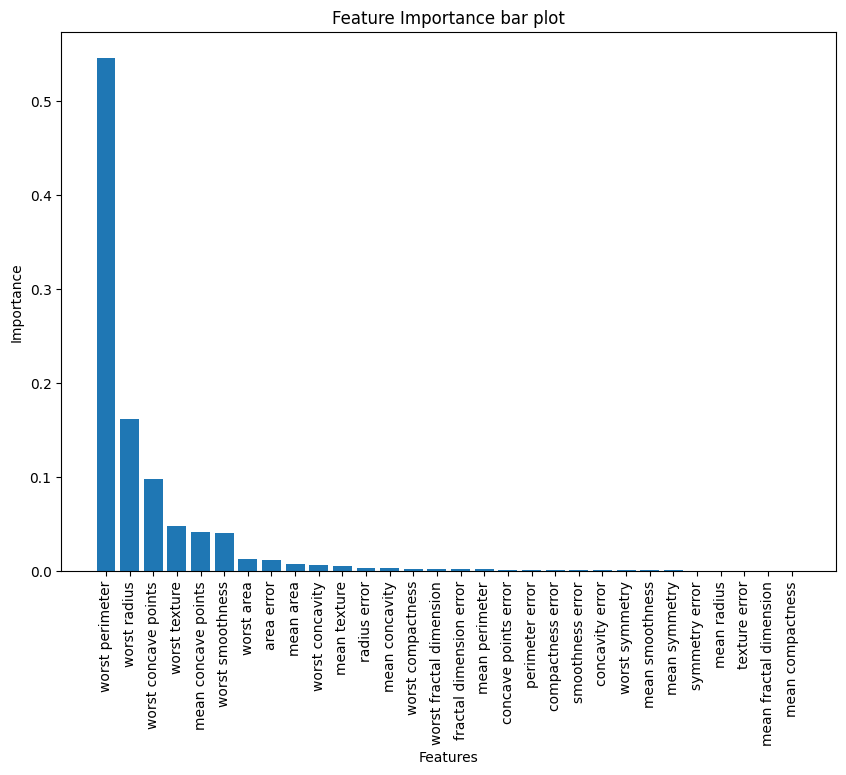

In [4]:
cancer = load_breast_cancer()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=95)

gbc = GradientBoostingClassifier(random_state=95)
gbc.fit(X_train_c, y_train_c)

imp = gbc.feature_importances_

idx_sorted_imp = np.argsort(imp)[::-1]  #reversed means descending
names = [cancer.feature_names[i] for i in idx_sorted_imp]   #names in same order

print('Feature Importances (top 10 only in descending order):')
for name, score in zip(names[:10], imp[idx_sorted_imp[:10]]):
    print(f'\t{name}: {score:.4f}')


plt.figure(figsize=(10,7))
plt.title("Feature Importance bar plot")
plt.bar(range(cancer.data.shape[1]), imp[idx_sorted_imp])

plt.xticks(range(cancer.data.shape[1]), names, rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### **4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score**

In [5]:
gbr = GradientBoostingRegressor(random_state=95)    #used the prev sample data for regression
gbr.fit(Xr_train, yr_train)
r2 = r2_score(yr_test, gbr.predict(Xr_test))
print(f'Gradient Boosting Regressor R² Score: {r2:.2f}')

Gradient Boosting Regressor R² Score: 0.83


### **5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting**

In [6]:
import warnings
warnings.filterwarnings('ignore')

#on the cancer dataset

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=95)
xgb_clf.fit(X_train_c, y_train_c)
acc_xgb = accuracy_score(y_test_c, xgb_clf.predict(X_test_c))
acc_gbc = accuracy_score(y_test_c, gbc.predict(X_test_c))

print(f'XGBoost Classifier Accuracy: {acc_xgb:.2f}')
print(f'Gradient Boosting Classifier Accuracy: {acc_gbc:.2f}')  #already done erlier

XGBoost Classifier Accuracy: 0.95
Gradient Boosting Classifier Accuracy: 0.93


### **6. Train a CatBoost Classifier and evaluate using F1-Score**

In [7]:
cbc = CatBoostClassifier(verbose=0, random_state=95)
cbc.fit(X_train_c, y_train_c)   #on cancer dataset
y_pred_cbc = cbc.predict(X_test_c)
f1 = f1_score(y_test_c, y_pred_cbc)
print(f'CatBoost Classifier F1-Score: {f1:.2f}')

CatBoost Classifier F1-Score: 0.95


### **7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)**

In [8]:
xgb_reg = XGBRegressor(random_state=95)
xgb_reg.fit(Xr_train, yr_train)
mse = mean_squared_error(yr_test, xgb_reg.predict(Xr_test))
print(f'XGBoost Regressor MSE: {mse:.2f}')

XGBoost Regressor MSE: 7449.76


### **8. Train an AdaBoost Classifier and visualize feature importance**

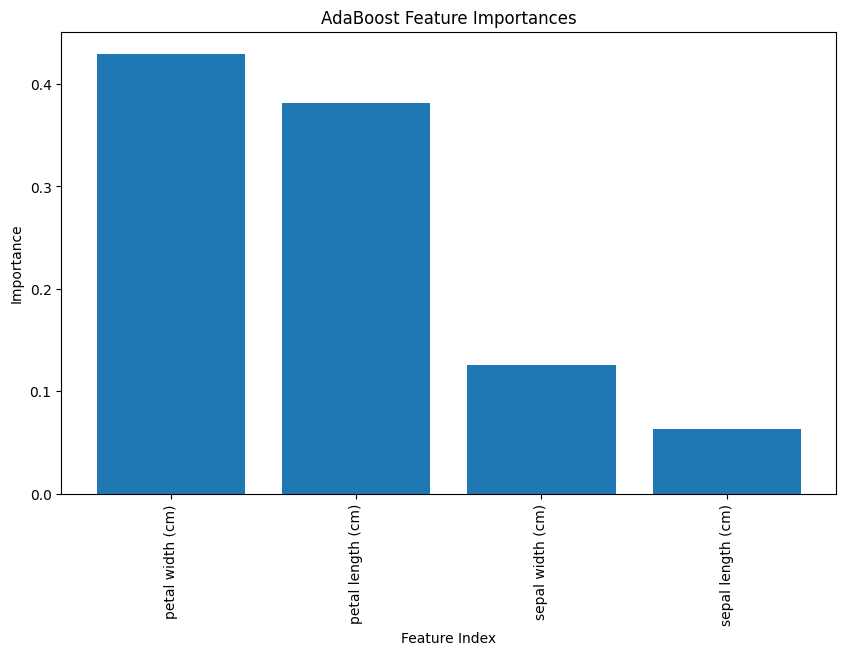

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=95)

adb = AdaBoostClassifier(random_state=95)
adb.fit(X_train, y_train)

importances = adb.feature_importances_

idx_imp = np.argsort(importances)[::-1]
idx_names = [iris.feature_names[i] for i in idx_imp]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[idx_imp])
plt.title('AdaBoost Feature Importances')
plt.xticks(range(X.shape[1]) ,idx_names, rotation = 90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
# plt.grid(True)
plt.show()

### **9. Train a Gradient Boosting Regressor and plot learning curves**

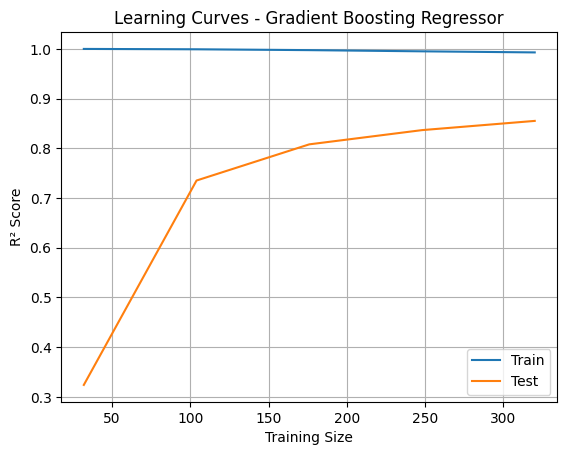

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(GradientBoostingRegressor(random_state=95), Xr_train, yr_train, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.title('Learning Curves - Gradient Boosting Regressor')
plt.legend()
plt.grid(True)
plt.show()

### **10. Train an XGBoost Classifier and visualize feature importance**

In [11]:
#function for plotting feature importance in barplot
def plot_importance(imp: np.ndarray, feature_names: list[str], title: str):
    """
    Args:
        imp (np.ndarray): output of the clf.feature_importances_
        feature_names (list[str]): data.feature_names can be given directly without storing in variable
        title (str): title for the plot, basically to mention the model in the plot

    Returns:
        A bar plot in descending order to visualize the feature importance
    """
    idx_of_imp = np.argsort(imp)[::-1]
    idx_f_names = [feature_names[i] for i in idx_of_imp]
    plt.figure(figsize=(10,7))
    plt.title(title)
    plt.bar(range(len(idx_f_names)), imp[idx_of_imp])

    plt.xticks(range(len(idx_f_names)), idx_f_names, rotation = 90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()


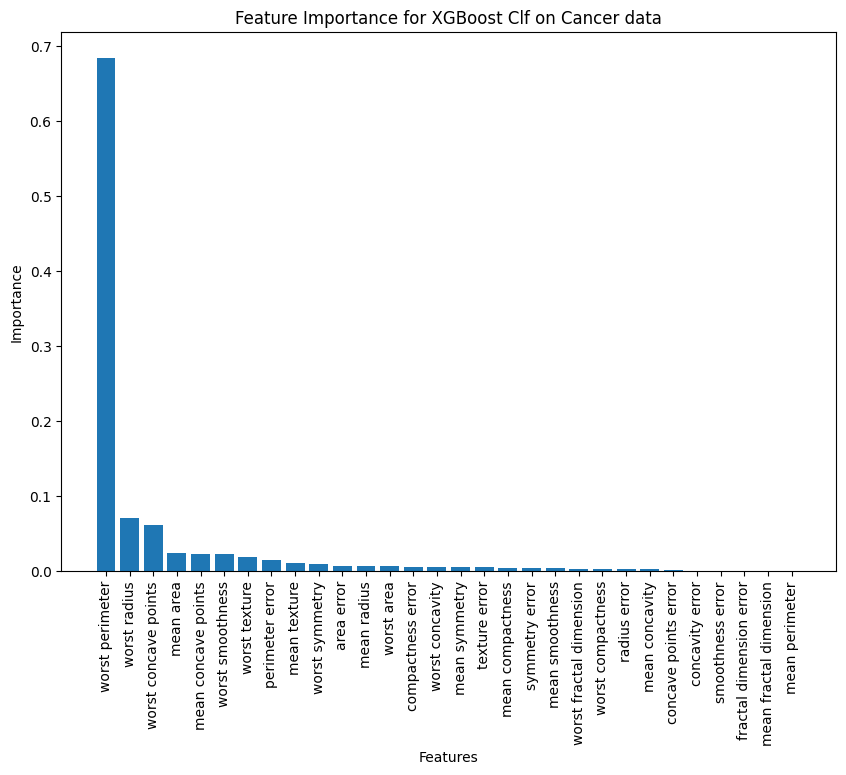

In [12]:

cancer = load_breast_cancer()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=95)


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=95)

xgb_clf.fit(X_train_c, y_train_c)

imp = xgb_clf.feature_importances_

plot_importance(imp=imp, feature_names=cancer.feature_names, title="Feature Importance for XGBoost Clf on Cancer data")


# idx_sorted_imp = np.argsort(imp)[::-1]  #reversed means descending
# names = [cancer.feature_names[i] for i in idx_sorted_imp]   #names in same order

# print('Feature Importances (top 10 only in descending order):')
# for name, score in zip(names[:10], imp[idx_sorted_imp[:10]]):
#     print(f'\t{name}: {score:.4f}')


# plt.figure(figsize=(10,7))
# plt.title("Feature Importance bar plot")
# plt.bar(range(cancer.data.shape[1]), imp[idx_sorted_imp])

# plt.xticks(range(cancer.data.shape[1]), names, rotation = 90)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.show()

In [13]:
type(imp)

numpy.ndarray

### **11. Train a CatBoost Classifier and plot the confusion matrix**

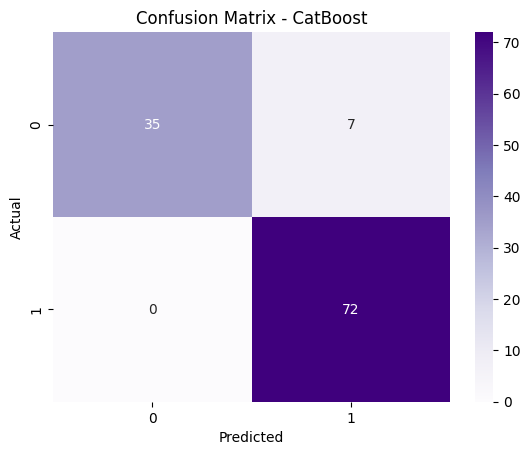

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cbc = CatBoostClassifier(verbose=0, random_state=95)

cbc.fit(X_train_c, y_train_c)   #cancer data
y_pred_cb = cbc.predict(X_test_c)
cm = confusion_matrix(y_test_c, y_pred_cb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

### **12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy**

In [15]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=95)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=95)

for n in [10, 50, 100, 200]:
    clf_n = AdaBoostClassifier(n_estimators=n, random_state=95)
    clf_n.fit(X_train, y_train)
    acc_n = accuracy_score(y_test, clf_n.predict(X_test))
    print(f'n_estimators={n}: Accuracy = {acc_n:.2f}')

n_estimators=10: Accuracy = 0.90
n_estimators=50: Accuracy = 0.91
n_estimators=100: Accuracy = 0.90
n_estimators=200: Accuracy = 0.91


### **13. Train a Gradient Boosting Classifier and visualize the ROC curve**

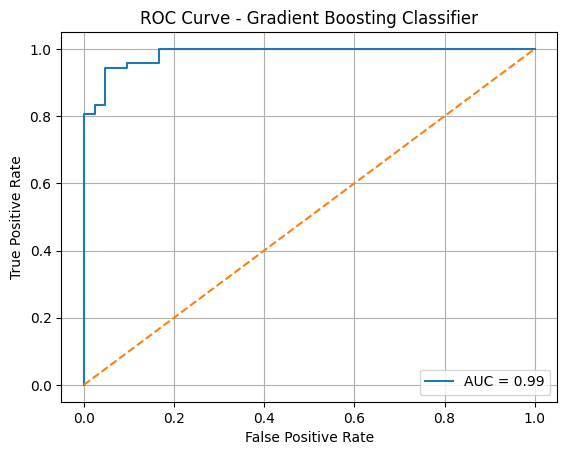

In [16]:
from sklearn.metrics import roc_curve, auc

#roc = fpr v. tpr
gbc.fit(X_train_c, y_train_c)   #cancer data loaded earlier
y_prob = gbc.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend()
plt.grid(True)
plt.show()

### **14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV**

In [17]:
from sklearn.model_selection import GridSearchCV
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=95)

params = {'learning_rate': [0.01, 0.1, 0.2]}
gs = GridSearchCV(XGBRegressor(random_state=95), param_grid=params, cv=3, scoring='neg_mean_squared_error')
gs.fit(Xr_train, yr_train)
print('Best Learning Rate:', gs.best_params_['learning_rate'])
print('Best MSE:', -gs.best_score_)

Best Learning Rate: 0.1
Best MSE: 8216.777197034256


### **15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting**

In [18]:
X_imb, y_imb = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=95) #imbalanced
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=95)

### Computation of the appropriate weigths based on the data
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_imb)    #0, 1
weights = np.round(compute_class_weight(class_weight='balanced', classes=classes, y=y_train_imb), 3)
class_ws = dict(zip(classes, weights))
# print("Class Weights:", class_weights)
# weight for class i = total sample / num of uniq sample * sample of that class


cbc_no_w = CatBoostClassifier(verbose=0, random_state=95)
cbc_no_w.fit(X_train_imb, y_train_imb)
y_pred_no_w = cbc_no_w.predict(X_test_imb)

cbc_w = CatBoostClassifier(class_weights=class_ws, verbose=0, random_state=95)
cbc_w.fit(X_train_imb, y_train_imb)
y_pred_w = cbc_w.predict(X_test_imb)

print(f'F1-Score without Class Weights: {f1_score(y_test_imb, y_pred_no_w):.2f}')
print(f'F1-Score with Class Weights: {f1_score(y_test_imb, y_pred_w):.2f}')

F1-Score without Class Weights: 0.76
F1-Score with Class Weights: 0.78


### **16. Train an AdaBoost Classifier and analyze the effect of different learning rates**

In [19]:
for lr in [0.01, 0.1, 0.5, 1.0]:
    clf_lr = AdaBoostClassifier(learning_rate=lr, random_state=95)
    clf_lr.fit(X_train, y_train)
    acc_lr = accuracy_score(y_test, clf_lr.predict(X_test))
    print(f'Learning Rate={lr}: Accuracy = {acc_lr:.2f}')

Learning Rate=0.01: Accuracy = 0.90
Learning Rate=0.1: Accuracy = 0.90
Learning Rate=0.5: Accuracy = 0.91
Learning Rate=1.0: Accuracy = 0.91


### **17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss**

In [20]:
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

digits = load_digits()
X_digits, y_digits = digits.data, digits.target
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_digits, y_digits, test_size=0.2, random_state=95)

xgb_multi = XGBClassifier(objective='multi:softprob', num_class=10, eval_metric='mlogloss', random_state=95)
xgb_multi.fit(X_train_m, y_train_m)
y_prob_m = xgb_multi.predict_proba(X_test_m)
print(f'Multiclass Log-Loss: {log_loss(y_test_m, y_prob_m):.2f}')

Multiclass Log-Loss: 0.09


One Folder named "catboost_info" is automatically getting created in the present directory, possibly by the CatBoost library when training a model using CatBoostClassifier, CatBoostRegressor, etc. These might be are the cache memory files